In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import random
import pickle
import os

In [2]:
print(os.getcwd())

/home/yomna/RPS-NN


In [3]:
data_dir = os.getcwd() + '/archive/rps-cv-images'
categories = ['paper', 'rock','scissors']

In [4]:
path = os.path.join(data_dir, categories[0])
path

'/home/yomna/RPS-NN/archive/rps-cv-images/paper'

In [5]:
path = os.path.join(data_dir, categories[2])
path

'/home/yomna/RPS-NN/archive/rps-cv-images/scissors'

In [6]:
len(os.listdir(path))

750

In [7]:
path = os.path.join(data_dir, categories[1])
len(os.listdir(path))

726

In [8]:
path = os.path.join(data_dir, categories[0])
len(os.listdir(path))

712

(200, 300)


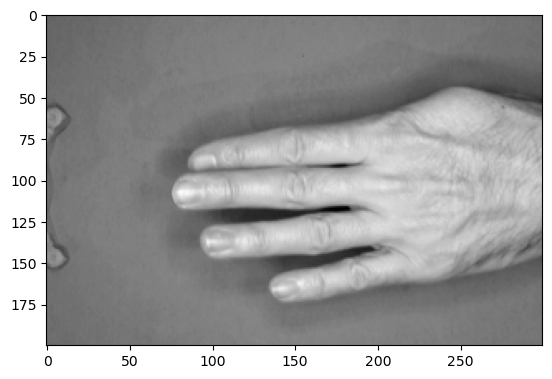

In [9]:
for categeory in categories:
    path = os.path.join(data_dir, categeory)
    for img in os.listdir(path):
        img = cv2.imread(os.path.join(path,img),0)
        plt.imshow(img, cmap='gray')
        print(img.shape)
        break
    break

(100, 100)


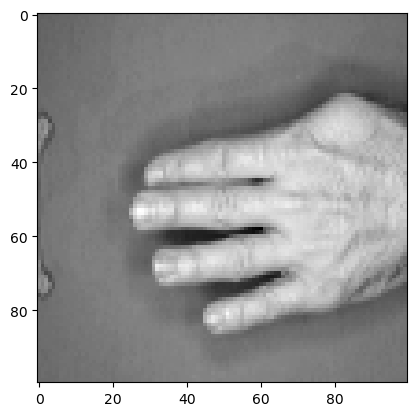

In [10]:
image_size = 100

new_img = cv2.resize(img, (image_size, image_size))
plt.imshow(new_img, cmap='gray')
print(new_img.shape)

In [11]:
def create_training_data(data_dir, categories, image_size = 100):

    training_data = []
    for categeory in categories:    
        path = os.path.join(data_dir, categeory)
        class_num = categories.index(categeory)

        
        for img in os.listdir(path):
            try:
                img = cv2.imread(os.path.join(path,img), 0)
                new_img = cv2.resize(img, (image_size, image_size))
                training_data.append([new_img, class_num])
            except:
                pass

    
    return training_data

In [12]:
data_dir = os.getcwd() + '/archive/rps-cv-images'
categories = ['paper', 'rock','scissors']
training_data = create_training_data(data_dir, categories)

In [13]:
len(training_data)

2188

In [14]:
training_data[0]

[array([[ 99,  96,  98, ..., 107, 105, 102],
        [ 99,  99, 100, ..., 107, 106, 105],
        [ 99, 101, 101, ..., 108, 107, 106],
        ...,
        [105, 107, 105, ..., 112, 113, 112],
        [105, 107, 106, ..., 112, 112, 112],
        [104, 105, 105, ..., 111, 111, 111]], dtype=uint8),
 0]

In [15]:
training_data[0][1]

0

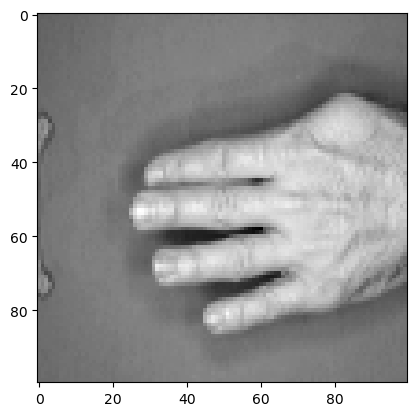

In [16]:
plt.imshow(training_data[0][0], cmap='gray')

In [17]:
random.shuffle(training_data)

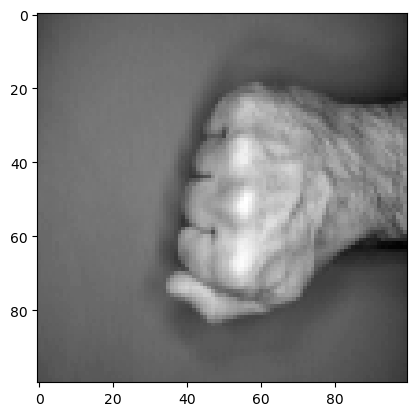

In [18]:
plt.imshow(training_data[0][0], cmap='gray')

In [19]:
X = []
y = []
for feature, label in training_data:
    X.append(feature)
    y.append(label)

X = np.array(X)
y = np.array(y)

In [20]:
X.shape

(2188, 100, 100)

In [21]:
X[0].shape

(100, 100)

In [22]:
y

array([1, 1, 2, ..., 2, 1, 0])

In [23]:
#save modified data
pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [24]:
#read modified data
pickle_in = open('X.pickle', 'rb')
X = pickle.load(pickle_in)

In [25]:
X.shape

(2188, 100, 100)